## Modeling Optimal Stopping Policy for a Burglar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n=100
p=0.1
wbar=100
w_std = 10


In [3]:
def simulate_burglary(n,p,wbar,w_std, make_plot=False):
    earnings = 0
    was_caught = False
    earnings_list = []
    expected_earnings_list = []
    days_list = []
    for i in range(n):
        # burglar gets caught
        if np.random.rand()<p:
            earnings = 0
            was_caught = True
            break
        else:
            earnings += np.random.normal(wbar, w_std)
        expected_earnings = (1-p)/p*wbar

        earnings_list.append(earnings)
        expected_earnings_list.append(expected_earnings)
        days_list.append(i)
        # stopping condition
        if earnings >= (1-p)/p*wbar:
            break
    if make_plot:
        plt.scatter(days_list, earnings_list, label='Earnings')
        plt.scatter(days_list, expected_earnings_list, label='Expected Earnings')
        plt.xlabel('Days')
        plt.ylabel('Earnings')
        plt.legend()
        plt.show()
    return earnings, i, was_caught

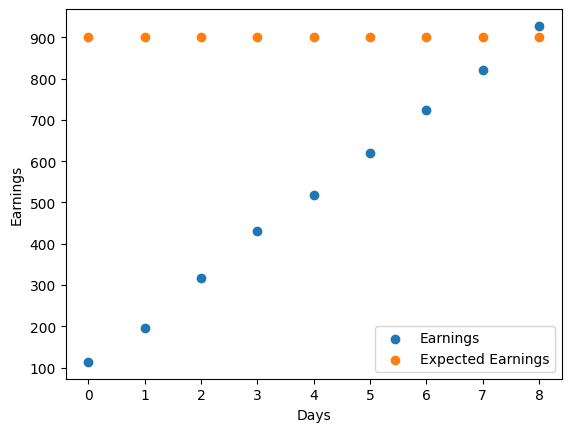

(927.4248777864689, 8, False)

In [4]:
simulate_burglary(n,p,wbar,w_std, make_plot=True)

In [5]:
earnings = np.empty(1000)
days = np.empty(1000)
caught = np.empty(1000)
for i in range(1000):
    money, n_iter, was_caught = simulate_burglary(n,p,wbar,w_std)
    earnings[i] = money
    days[i] = n_iter
    caught[i] = was_caught

In [6]:
np.mean(earnings)

np.float64(347.36450494542555)

([<matplotlib.axis.XTick at 0x24fc9a265d0>,
 [Text(0, 0, 'Caught'), Text(1, 0, 'Not Caught')])

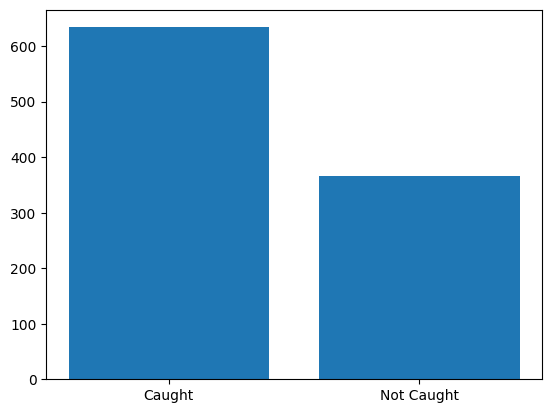

In [7]:
# bar chart of number of times caught to not caguht
plt.bar([0,1], [np.sum(caught), 1000-np.sum(caught)])
plt.xticks([0,1], ['Caught', 'Not Caught'])

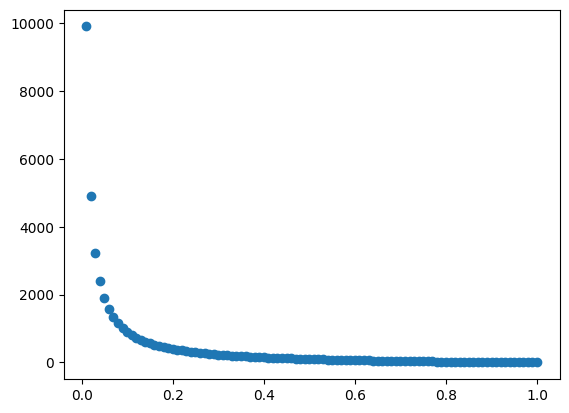

In [8]:
list_of_earnings = []
x_range = np.linspace(0.01, 1, 100)
earnings_range = (1-x_range)/x_range*wbar
for p in x_range:
    # money, n_iter, was_caught = simulate_burglary(n,p,wbar,w_std)
    expected_earnings = (1-p)/p*wbar
    list_of_earnings.append(money)
    # earnings[n] = money
    # days[n] = n_iter
    # caught[n] = was_caught

plt.scatter(x_range, earnings_range)